In [1]:
#!/usr/bin/python
# -*- coding: sjis -*-

import sys
import torch
import torch.nn as nn
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mynet import SSD
from myfunctions import decode

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
img_path = "mydog.png"
model_path = "ssd300_mAP_77.43_v2.pth"
#model_path = "ssd3-2.model"

In [61]:
#argvs = sys.argv
#argc = len(argvs)

net = SSD(phase='test')
#net.load_state_dict(torch.load(argvs[2]))
net.load_state_dict(torch.load(model_path))

<All keys matched successfully>

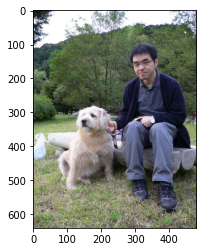

In [62]:
#image = cv2.imread(argvs[1], cv2.IMREAD_COLOR)
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [63]:
x = cv2.resize(image, (300, 300)).astype(np.float32)
x -= (104.0, 117.0, 123.0) # 平均画像を引く
x = x[:, :, ::-1].copy()  # BGR を RGB へ
x = x.transpose(2, 0, 1)  # [300,300,3]→ [3,300,300]
x = torch.from_numpy(x)
x = x.unsqueeze(0)

In [64]:
net.eval() 
with torch.no_grad():
    y = net(x)

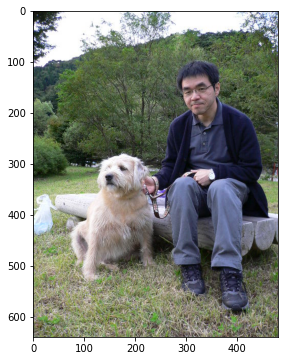

In [65]:
labels = ['aeroplane', 'bicycle', 'bird', 'boat',
          'bottle', 'bus', 'car', 'cat', 'chair',
          'cow', 'diningtable', 'dog', 'horse',
          'motorbike', 'person', 'pottedplant',
          'sheep', 'sofa', 'train', 'tvmonitor']

plt.figure(figsize=(10,6))
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
plt.imshow(rgb_image)

dog: 1.00
pt= [ 67.073586 292.14432  258.65955  517.6754  ]
coords= ((67.073586, 292.14432), 192.58596801757812, 226.53109741210938)
color= [0.0, 0.4562523625023627, 1.0, 1.0]
person: 1.00
pt= [213.10779  91.19096 462.20016 582.14655]
coords= ((213.10779, 91.19096), 250.09237670898438, 491.95556640625)
color= [0.44705736433677606, 0.0, 1.0, 1.0]


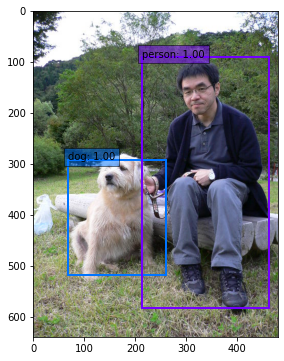

In [66]:
plt.figure(figsize=(10,6))
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
plt.imshow(rgb_image)

currentAxis = plt.gca()
detections = y.data
scale = torch.Tensor(rgb_image.shape[1::-1]).repeat(2)

spec = 0.6
for i in range(detections.size(1)):  
    j = 0
    # 確信度confが0.6以上のボックスを表示
    while detections[0,i,j,0] >= spec:
        score = detections[0,i,j,0]
        label_name = labels[i-1]
        display_txt = '%s: %.2f'%(label_name, score)
        print(display_txt)
        pt = (detections[0,i,j,1:]*scale).cpu().numpy()
        print("pt=",pt)
        coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
        print("coords=",coords)
        color = colors[i]  ## クラス毎に色が決まっている
        print("color=",color)
        
        #---Rectangle(xy=(0, 0), width=0.25, height=0.5, ec='#000000', fill=False)
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
        j+=1
plt.savefig("result.jpg")
plt.show()